In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


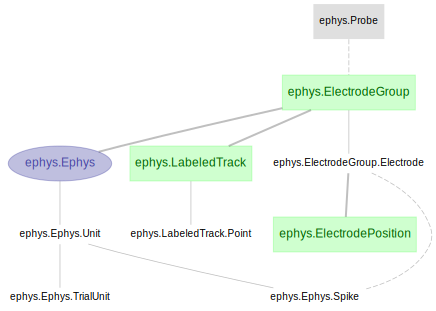

In [3]:
dj.ERD(ephys)

In [4]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

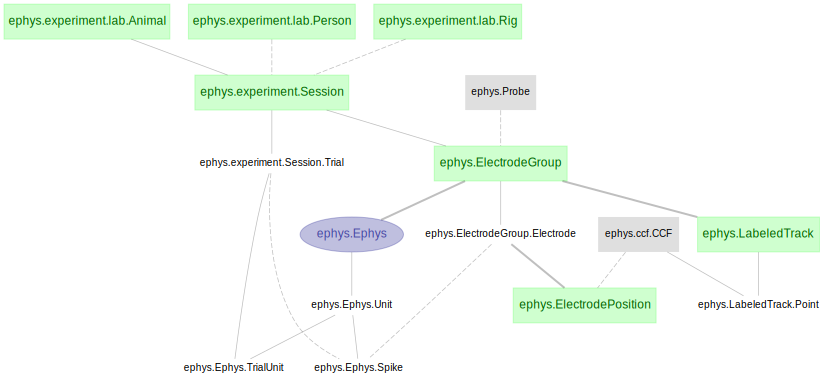

In [5]:
dj.ERD(ephys)-2

In [6]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
399752,2017-08-01
400483,2017-08-01


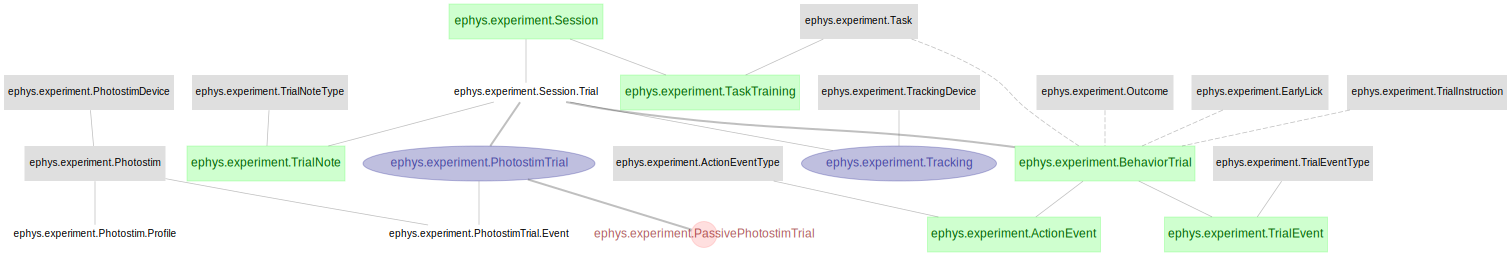

In [7]:
dj.ERD(ephys.experiment)

In [8]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig
123456,1,2017-10-21,daveliu,RRig
399752,1,2017-11-14,daveliu,TRig1
399752,2,2017-11-16,daveliu,TRig1
399752,3,2017-11-22,daveliu,TRig1
399752,4,2017-11-23,daveliu,TRig1
399752,5,2017-11-24,daveliu,TRig1
399752,6,2017-11-26,daveliu,TRig1


In [9]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


In [10]:
ephys.Probe()

probe_part_no,probe_description
123123123,neuropixel probe


In [11]:
eGroup=ephys.ElectrodeGroup()

In [12]:
#eGroup.insert1((123456, 1, 1, '123123123', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [13]:
eIns=eGroup.fetch1('animal', 'session', 'electrode_group')
elect=eGroup.Electrode()
eIns
elect
#elect.insert(np.asarray(eIns), 0)

animal Janelia ANM ID (6 digits),session session number,electrode_group,electrode


In [14]:
eGroup

animal Janelia ANM ID (6 digits),session session number,electrode_group,probe_part_no,ephys_filepath
123456,1,1,123123123,C:\Users\liul.HHMI\Desktop\real5ap_imec3_opt3_jrc.mat


In [15]:
np.asarray(eIns)

array([123456,      1,      1], dtype=int64)

In [16]:
import h5py
root="C:\\Users\\liul.HHMI\\Desktop\\"
data_file = root + 'real5ap_imec3_opt3_jrc.mat'

In [20]:
f = h5py.File(data_file,'r')
ind = np.argsort(f['S_clu']['viClu'][0]) # index sorted by cluster
cluster_ids = f['S_clu']['viClu'][0][ind] # cluster (unit) number
spike_times = f['viTime_spk'][0][ind] # spike times
mrPos_spk_x = f['mrPos_spk'][0][ind]
mrPos_spk_y = f['mrPos_spk'][1][ind]
viT_offset_file = f['viT_offset_file'][:] # start of each trial
sRateHz = f['P']['sRateHz'][0]
cviSpk_site = f['cviSpk_site'][:,0]
data = []
for column in f['cviSpk_site']:
    row_data = []
    for row_number in range(len(column)):            
        row_data.append(f[column[row_number]][:])   
    data.append(row_data)
# cluster index 0 is noise cluster
#plt.plot(mrPos_spk_y + mrPos_spk_x, cluster_ids, '.')
data

[[array([[  7.20000000e+01,   2.97000000e+02,   3.12000000e+02, ...,
            3.31163000e+06,   3.31238300e+06,   3.31276900e+06]])],
 [array([0, 1], dtype=uint64)],
 [array([[  2.08700000e+03,   2.22500000e+03,   2.61200000e+03, ...,
            3.30970200e+06,   3.31070100e+06,   3.31262700e+06]])],
 [array([[  2.52600000e+03,   3.74800000e+03,   3.96500000e+03, ...,
            3.31020200e+06,   3.31021900e+06,   3.31023600e+06]])],
 [array([[   58975.,    86461.,    95691.,   189421.,   193311.,   193706.,
            213049.,   213914.,   245636.,   245655.,   289612.,   289622.,
            341627.,   376421.,   392690.,   396133.,   396146.,   416675.,
            453219.,   457240.,   462613.,   467112.,   478377.,   508420.,
            529511.,   545187.,   573785.,   597284.,   617652.,   621270.,
            644812.,   644849.,   654736.,   656947.,   659410.,   666608.,
            670189.,   683896.,   699774.,   701929.,   729298.,   743700.,
            745620.,   74

In [ ]:
clu_ids_diff = np.diff(cluster_ids)
clu_ids_diff = np.where(clu_ids_diff != 0)[0] + 1

In [ ]:
units = np.split(spike_times, clu_ids_diff)


In [ ]:
unit_ids = np.arange(len(clu_ids_diff))

In [ ]:
np.insert(units, [1], unit_ids, axis = 1)

In [ ]:
Ephys=ephys.Ephys()

In [ ]:
Ephys.populate()

In [21]:
sRateHz

array([ 30000.])

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
ephys.experiment.ActionEvent()